In [1]:
#Import the previously downloaded tweet database as a Pandas object
import pandas as pd
df=pd.read_csv('newtweets_Nepal11Apr-9thMay_complete.txt',encoding='utf-16',sep='\t')

In [2]:
#Find how many user moved from one location to another over time
from collections import Counter

userlocarray=[]
for user in set(df.Username):
    userL3=df[df.Username==user].L3 #Get subset of the dataframe for this user and the L3 column
    userL4=df[df.Username==user].L4
    L3counts=Counter(userL3)
    L4counts=Counter(userL4)
    
    L3common=L3counts.most_common(1)[0][0] #access the most common L3 name
    L3num=L3counts.most_common(1)[0][1] #access the most common L3 count
    L4common=L4counts.most_common(1)[0][0]
    L4num=L4counts.most_common(1)[0][1]   
    L3ratio=L3num/len(userL3) #freq of most common item over all items
    L4ratio=L4num/len(userL4)
    userlocarray.append([user,L3common,L3ratio,L4common,L4ratio])

Populating the interactive namespace from numpy and matplotlib


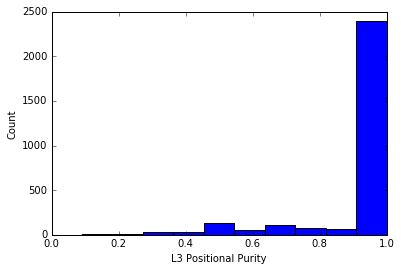

In [3]:
#Plot how many users stayed within their L3 zones
countme=[w[2] for w in userlocarray]
import matplotlib.pyplot as plt
%pylab inline
plt.ylabel('Count')
plt.xlabel('L3 Positional Purity')
plt.hist(countme)
plt.show()


#Positional purity is defined as the number of times a user is at the most frequent L3 location 
# divided by the total number of instances his location is recorded in the tweets

In [4]:
UserArray_set=set(df.Username)

In [5]:
#Download additional tweets from all the users captured in the initial database which did not have their location on and hence were not caputed
import sys
import pyquery
import got3


cols=['TweetId','permalink','Username','Text','Date','Retweets','Favorites','Mentions','Hashtags','Geo']
df_user = pd.DataFrame(columns=cols)

UserArray=[item for item in UserArray_set]

for user in UserArray:
    tweetCriteria = got3.manager.TweetCriteria().setUsername(user).setSince("2015-04-11").setUntil("2015-05-09") #download tweets from every user in the same timeframe
    T_id=[(i.id,i.permalink,i.username,i.text,i.date,i.retweets,i.favorites,i.mentions,i.hashtags,i.geo) for i in got3.manager.TweetManager.getTweets(tweetCriteria)]#save that in a array
    #Add to a Pandas database
    usertemp = pd.DataFrame(T_id,columns=cols)
    frames = [df_user,usertemp]
    df_user= pd.concat(frames)
    
#save the database into a text file
df_user.to_csv('username_tweethistory.txt',encoding='utf-8')